# Estimaciones: Vehíliculos ligeros en México, 2005-2019

Datos: Registro administrativo de la industria automotriz de vehículos ligeros, INEGI

Frecuencia: Mensual

Periodo: 2005 Enero, 2019 Octubre


Elaboración: Subsecretaría de Industria, Comercio y Competitividad, Secretaría de Economía, con datos del INEGI. 


Pedro José Martínez Alanis

<pedro.martinez@economia.gob.mx>

Actualización: Noviembre 22, 2019

In [1]:
# library 
Packages <- c("tidyverse","lubridate","ggplot2", "dplyr", "seasonal", "ggseas", "ggfortify", "forecast", "mFilter", "plotly", "dynlm", "AER", "MASS", "corrr", "corrplot")
suppressMessages(invisible(lapply(Packages, library, character.only=TRUE)))
#set strings as factors to false 
options(stringsAsFactors=FALSE)
#search()

In [2]:
# raw data 
    rawdata <- read_csv("data/veh_lig.csv", col_types = cols() )
    rawdata <- data.frame(mutate(rawdata, time = make_date(year, mes) ))
# variable selection 
    lmacro <-c("trabajadores" , "masa_salarial" , "ms_wrk" , "tiie" , "tc_fix" , "cetes28" , "inpc" , "pi" , "inpc_auto" , "pi_autos" , "inpc_combusible", "pi_combustible")
    lqv <- c("qv" , "qv_mex" , "qv_imp" , "qv_deu" , "qv_bra" , "qv_can" , "qv_jpn" , "qv_gbr" , "qv_usa" , "qv_ind", "qv_kor" , "qv_tha" , "qv_1" , "qv_2" , "qv_7" )
    lqp <- c("qp" , "qp_1" , "qp_2" , "qp_7")
    lqx <- c("qx" , "qx_deu" , "qx_nafta" , "qx_fca" , "qx_ford" , "qx_gm" , "qx_nsa" , "qx_tyo" , "qx_vw" , "qx_hmc" , "qx_nafta_fca" , "qx_nafta_ford" , "qx_nafta_gm" , "qx_nafta_nsa" , "qx_nafta_tyo" , "qx_nafta_vw" , "qx_nafta_hmc" , "qx_1" , "qx_nafta_1" , "qx_2" , "qx_nafta_2" , "qx_7" , "qx_nafta_7")
# ts data
    wrk <- ts(as_tibble(subset(rawdata, select=c("year", "mes",lmacro,lqv,lqp,lqx))), frequency=12, start=c(2005,1), end=c(2019,10))
    #head(wrk,3)

In [3]:
# lista de variables: seasonal adjustment 
wlist <- lmacro
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_sa") }
lmacro_sa <- wlist

wlist <- lqv
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_sa") }
lqv_sa <- wlist

wlist <- lqp
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_sa") }
lqp_sa <- wlist

wlist <- lqx
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_sa") }
lqx_sa <- wlist
rm(wlist)

# lista de variables: tendencia-ciclo
wlist <- lmacro
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_tr") }
lmacro_tr <- wlist

wlist <- lqv
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_tr") }
lqv_tr <- wlist

wlist <- lqp
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_tr") }
lqp_tr <- wlist

wlist <- lqx
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_tr") }
lqx_tr <- wlist
rm(wlist)

In [4]:
wrk <- ts(as_tibble(read_csv("output/autos/wrk_macro.csv", col_types = cols() )), frequency=12, start=c(2005,1), end=c(2019,10))
#dim(wrk)
wrk_sa <- ts(subset(as_tibble(wrk), select=c(lmacro_sa,lmacro_tr,lqv_sa,lqv_tr, lqp_sa,lqp_tr, lqx_sa, lqx_tr)), frequency=12, start=c(2005,1), end=c(2019,10))
lwrk_sa <- names(as_tibble(wrk_sa))
#head(wrk_sa,3)


## Estimación OLS: Ventas de vehículos ligeros en México


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39814 -0.10873  0.02417  0.11206  0.22896 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.723117   2.028628   3.807 0.000195 ***
log(masa_salarial_sa)  0.136149   0.096617   1.409 0.160581    
tc_fix_sa              0.044935   0.010619   4.232 3.76e-05 ***
cetes28_sa             0.025108   0.006364   3.945 0.000116 ***
pi_autos_sa           -0.026131   0.006011  -4.347 2.35e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.145 on 173 degrees of freedom
Multiple R-squared:  0.5694,	Adjusted R-squared:  0.5594 
F-statistic: 57.18 on 4 and 173 DF,  p-value: < 2.2e-16


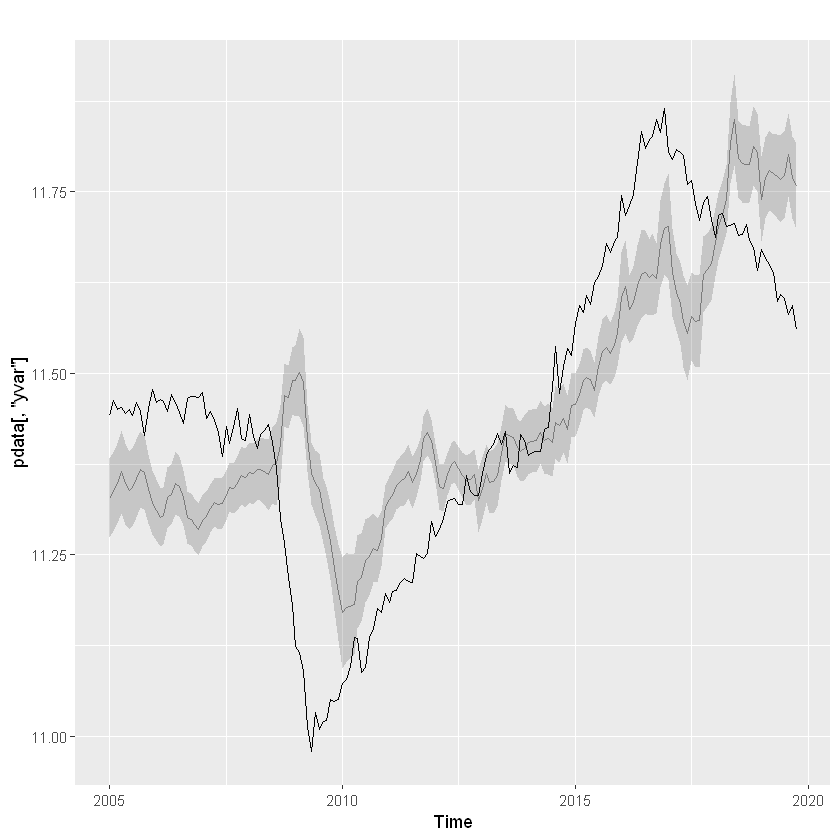

In [5]:
yvar <- ts(log(wrk_sa[,'qv_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa , data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)


## Estimación OLS: Ventas de vehículos ligeros en México, producción nacional


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42384 -0.10600  0.02386  0.11038  0.28855 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.104347   2.072415   3.428 0.000760 ***
log(masa_salarial_sa)  0.143899   0.098702   1.458 0.146680    
tc_fix_sa              0.036373   0.010848   3.353 0.000983 ***
cetes28_sa            -0.030927   0.006502  -4.757 4.13e-06 ***
pi_autos_sa           -0.021495   0.006141  -3.501 0.000591 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1482 on 173 degrees of freedom
Multiple R-squared:  0.5457,	Adjusted R-squared:  0.5352 
F-statistic: 51.95 on 4 and 173 DF,  p-value: < 2.2e-16


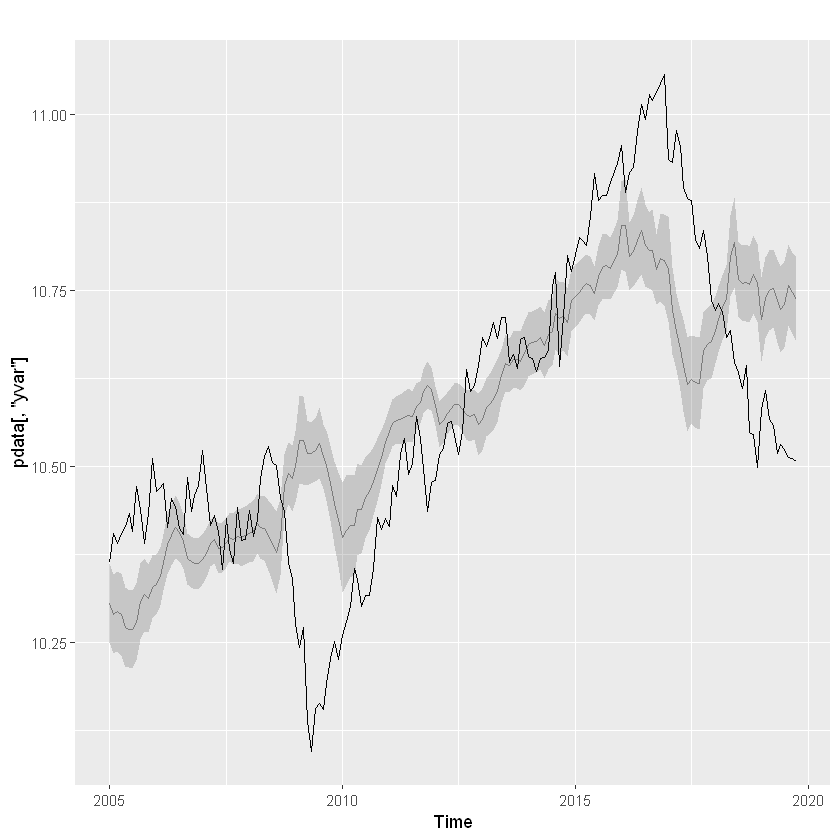

In [6]:
yvar <- ts(log(wrk_sa[,'qv_mex_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa , data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)


## Estimación OLS: Ventas de vehículos ligeros en México, importados totales


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48992 -0.09446  0.01395  0.13524  0.24242 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.476766   2.215076   3.375  0.00091 ***
log(masa_salarial_sa)  0.107833   0.105497   1.022  0.30814    
tc_fix_sa              0.052699   0.011595   4.545 1.03e-05 ***
cetes28_sa             0.063953   0.006949   9.203  < 2e-16 ***
pi_autos_sa           -0.028595   0.006563  -4.357 2.26e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1584 on 173 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6303 
F-statistic: 76.43 on 4 and 173 DF,  p-value: < 2.2e-16


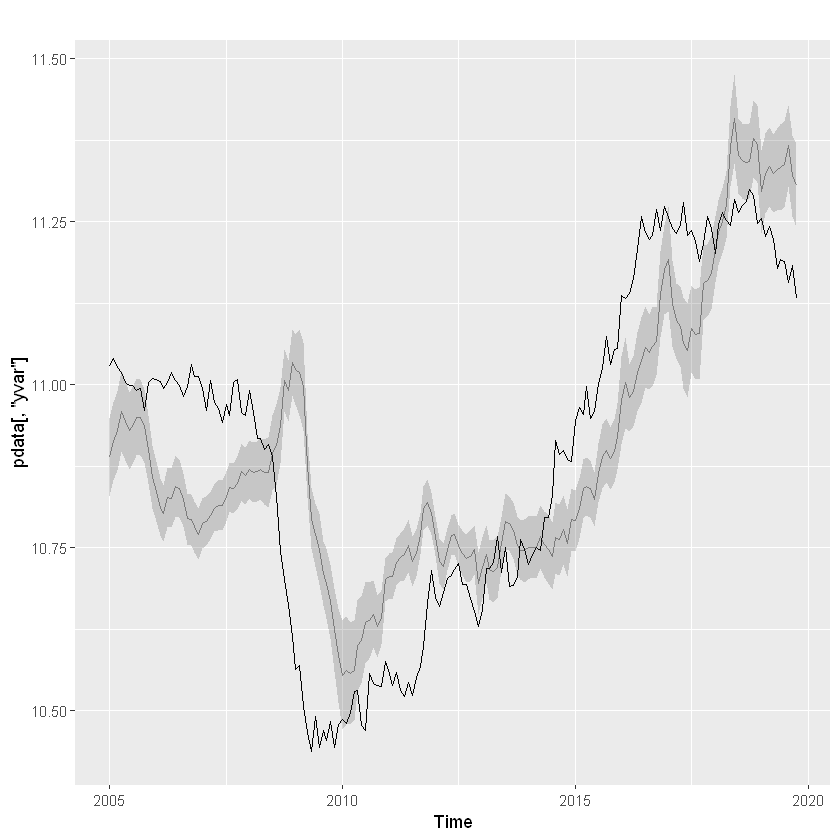

In [7]:
yvar <- ts(log(wrk_sa[,'qv_imp_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa , data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)


## Estimación OLS: Ventas de vehículos ligeros en México, importados de EEUU


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34097 -0.10605 -0.00343  0.11496  0.33909 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           19.282008   2.132812   9.041 3.08e-16 ***
log(masa_salarial_sa) -0.462306   0.101579  -4.551 1.00e-05 ***
tc_fix_sa              0.012943   0.011165   1.159 0.247932    
cetes28_sa             0.057754   0.006691   8.631 3.84e-15 ***
pi_autos_sa           -0.023872   0.006319  -3.778 0.000218 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1525 on 173 degrees of freedom
Multiple R-squared:  0.6473,	Adjusted R-squared:  0.6392 
F-statistic: 79.38 on 4 and 173 DF,  p-value: < 2.2e-16


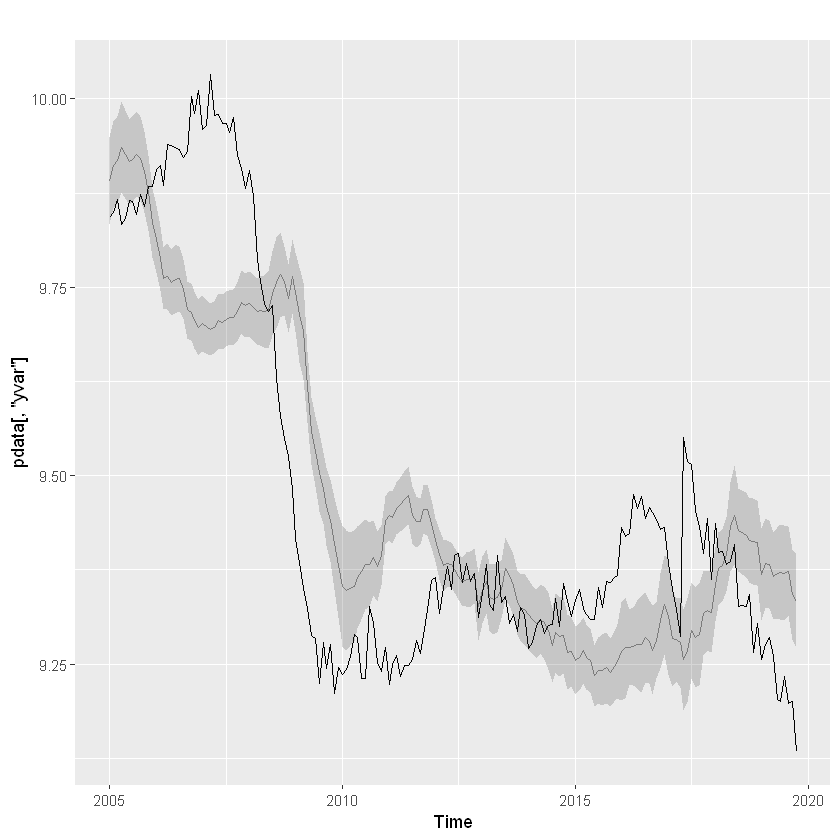

In [8]:
yvar <- ts(log(wrk_sa[,'qv_usa_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa , data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)


## Estimación OLS: Ventas de vehículos ligeros en México, autos compactos


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38102 -0.06200  0.01534  0.07857  0.29445 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.159980   1.870456   0.086   0.9319    
log(masa_salarial_sa)  0.446459   0.089084   5.012 1.33e-06 ***
tc_fix_sa              0.003102   0.009791   0.317   0.7518    
cetes28_sa            -0.011467   0.005868  -1.954   0.0523 .  
pi_autos_sa           -0.014229   0.005542  -2.567   0.0111 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1337 on 173 degrees of freedom
Multiple R-squared:  0.5743,	Adjusted R-squared:  0.5645 
F-statistic: 58.35 on 4 and 173 DF,  p-value: < 2.2e-16


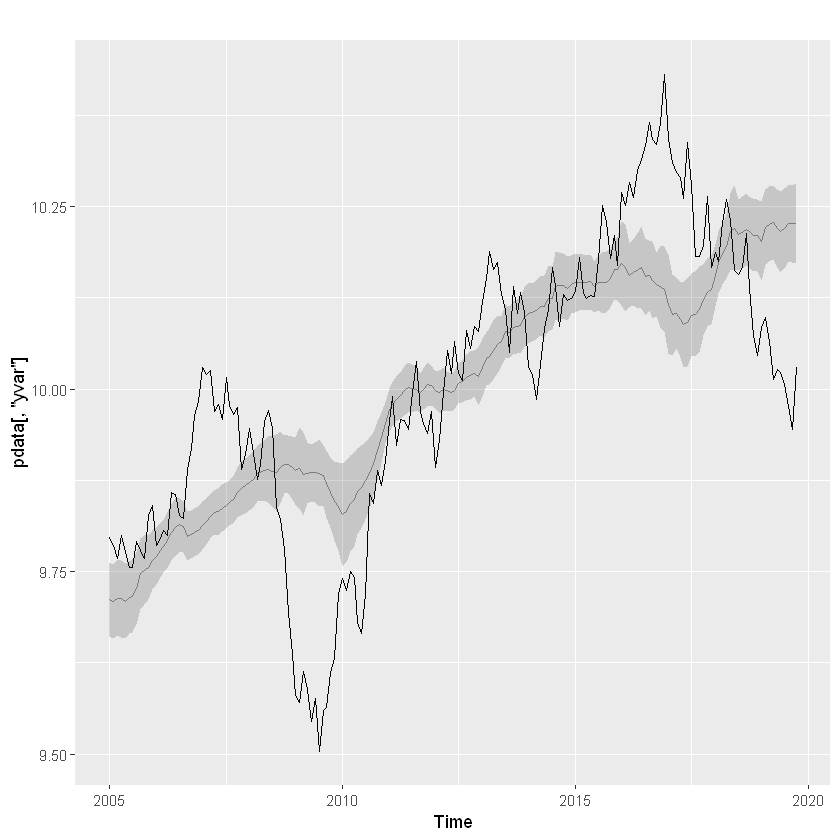

In [9]:
yvar <- ts(log(wrk_sa[,'qv_1_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa , data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)


## Estimación OLS: Ventas de vehículos ligeros en México, autos subcompactos


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60024 -0.13101  0.00096  0.17505  0.33976 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           11.803234   2.913000   4.052 7.66e-05 ***
log(masa_salarial_sa) -0.124639   0.138737  -0.898  0.37023    
tc_fix_sa              0.087743   0.015249   5.754 3.88e-08 ***
cetes28_sa             0.028883   0.009139   3.160  0.00186 ** 
pi_autos_sa           -0.039883   0.008631  -4.621 7.44e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2083 on 173 degrees of freedom
Multiple R-squared:  0.5177,	Adjusted R-squared:  0.5066 
F-statistic: 46.42 on 4 and 173 DF,  p-value: < 2.2e-16


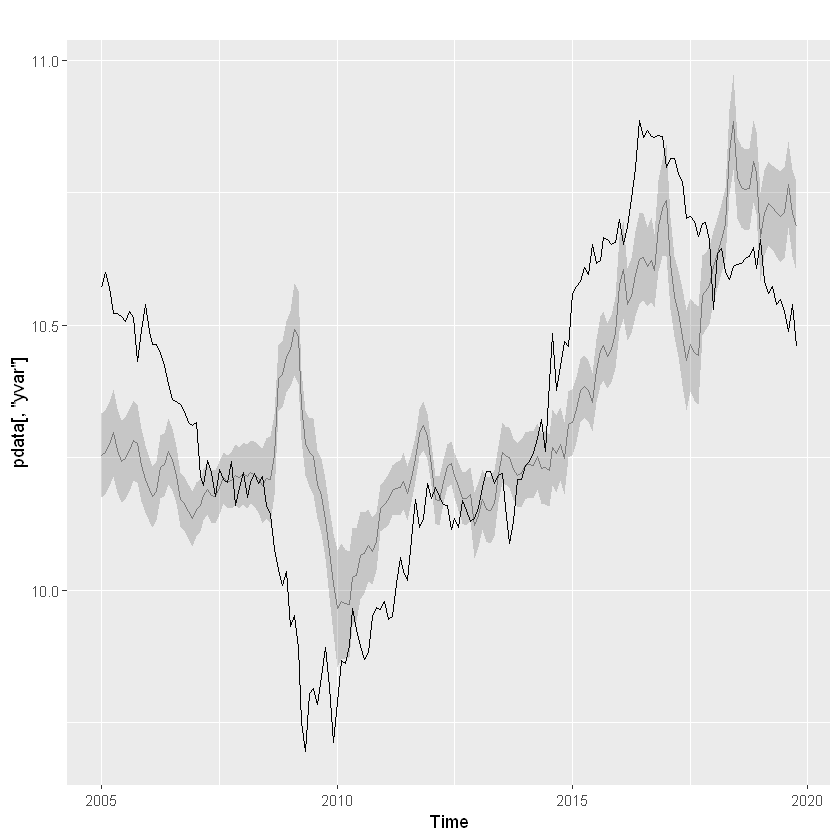

In [10]:
yvar <- ts(log(wrk_sa[,'qv_2_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa , data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)


## Estimación OLS: Ventas de vehículos ligeros en México, SUV


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30225 -0.09563  0.01941  0.11118  0.26669 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -5.839142   1.938528  -3.012 0.002983 ** 
log(masa_salarial_sa)  0.676426   0.092326   7.327 8.62e-12 ***
tc_fix_sa              0.033784   0.010148   3.329 0.001064 ** 
cetes28_sa             0.039278   0.006082   6.459 1.03e-09 ***
pi_autos_sa           -0.021270   0.005744  -3.703 0.000286 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1386 on 173 degrees of freedom
Multiple R-squared:  0.8281,	Adjusted R-squared:  0.8241 
F-statistic: 208.3 on 4 and 173 DF,  p-value: < 2.2e-16


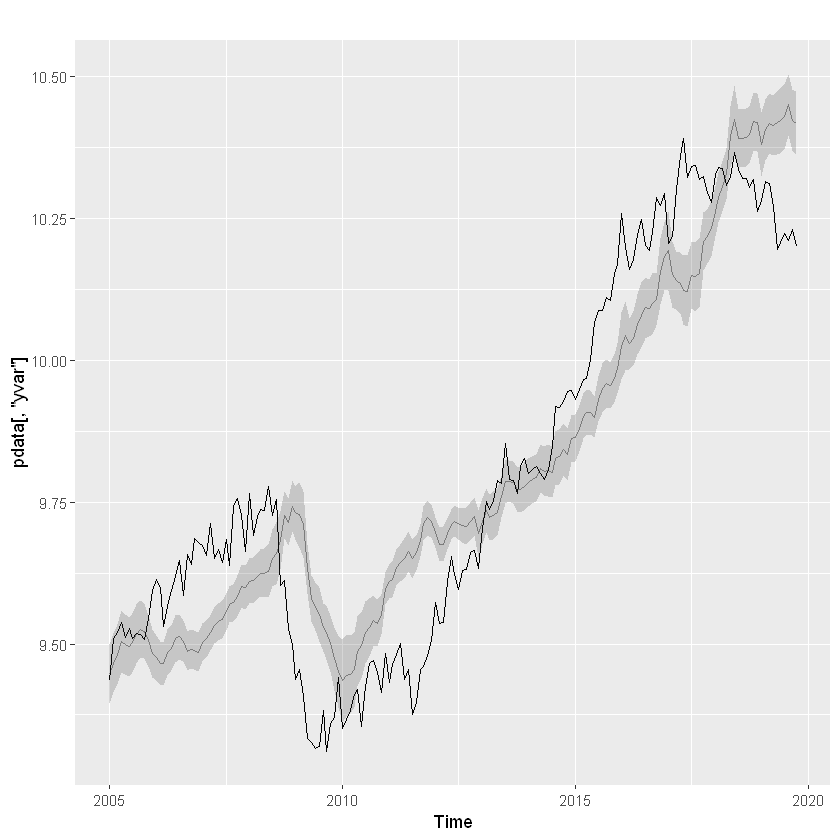

In [11]:
yvar <- ts(log(wrk_sa[,'qv_7_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa , data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)

## Estimación OLS: Producción de vehículos ligeros en México


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56064 -0.03233  0.01499  0.05818  0.22687 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -15.563227   1.698281  -9.164  < 2e-16 ***
log(masa_salarial_sa)   1.286430   0.080884  15.905  < 2e-16 ***
tc_fix_sa              -0.048061   0.008890  -5.406 2.11e-07 ***
cetes28_sa             -0.001656   0.005328  -0.311    0.756    
pi_autos_sa             0.008038   0.005032   1.597    0.112    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1214 on 173 degrees of freedom
Multiple R-squared:  0.8617,	Adjusted R-squared:  0.8585 
F-statistic: 269.5 on 4 and 173 DF,  p-value: < 2.2e-16


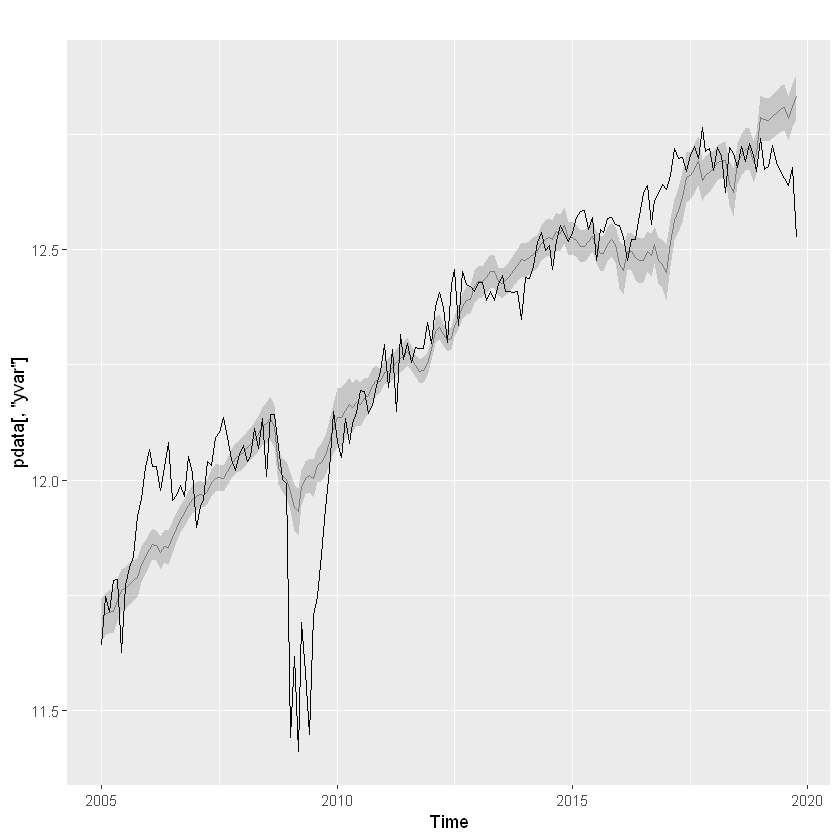

In [12]:
yvar <- ts(log(wrk_sa[,'qp_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa, data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)

## Estimación OLS: Producción de vehículos ligeros en México, autos compactos


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65680 -0.08211  0.02221  0.08737  0.39103 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.443076   2.327185   1.050 0.295275    
log(masa_salarial_sa)  0.438410   0.110836   3.955 0.000111 ***
tc_fix_sa             -0.026772   0.012182  -2.198 0.029303 *  
cetes28_sa            -0.054759   0.007301  -7.500 3.19e-12 ***
pi_autos_sa            0.003600   0.006895   0.522 0.602287    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1664 on 173 degrees of freedom
Multiple R-squared:  0.4798,	Adjusted R-squared:  0.4677 
F-statistic: 39.89 on 4 and 173 DF,  p-value: < 2.2e-16


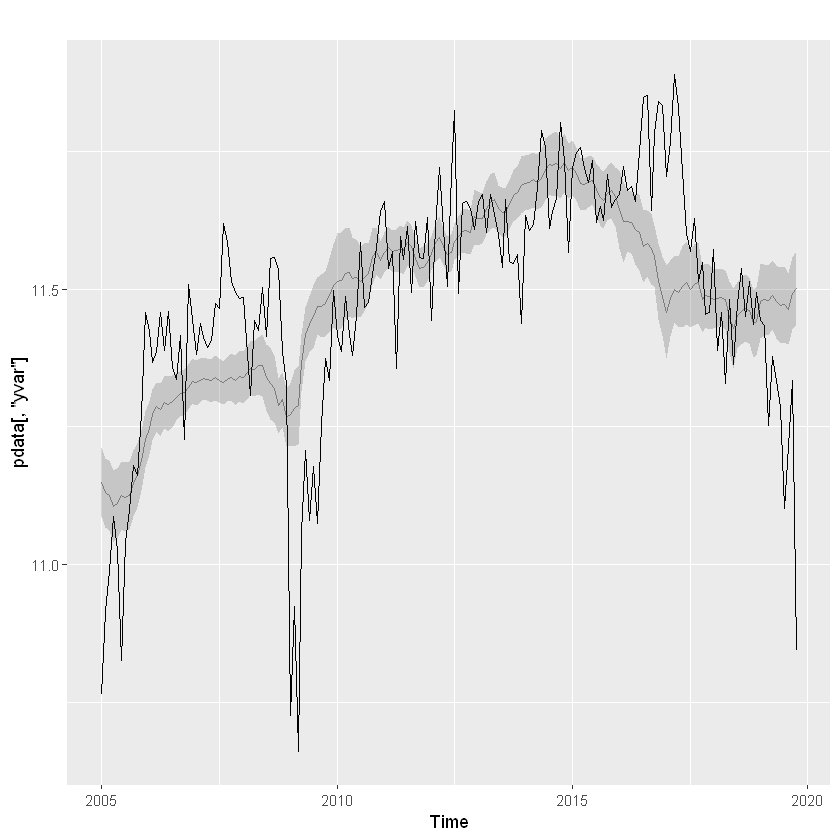

In [13]:
yvar <- ts(log(wrk_sa[,'qp_1_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa , data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)

## Estimación OLS: Producción de vehículos ligeros en México, autos subcompactos


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11320 -0.15147  0.04016  0.17888  0.67209 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -20.437919   3.863275  -5.290 3.66e-07 ***
log(masa_salarial_sa)   1.425907   0.183995   7.750 7.50e-13 ***
tc_fix_sa              -0.052384   0.020223  -2.590 0.010406 *  
cetes28_sa             -0.047170   0.012120  -3.892 0.000142 ***
pi_autos_sa            -0.004621   0.011447  -0.404 0.686960    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2762 on 173 degrees of freedom
Multiple R-squared:  0.6425,	Adjusted R-squared:  0.6342 
F-statistic: 77.71 on 4 and 173 DF,  p-value: < 2.2e-16


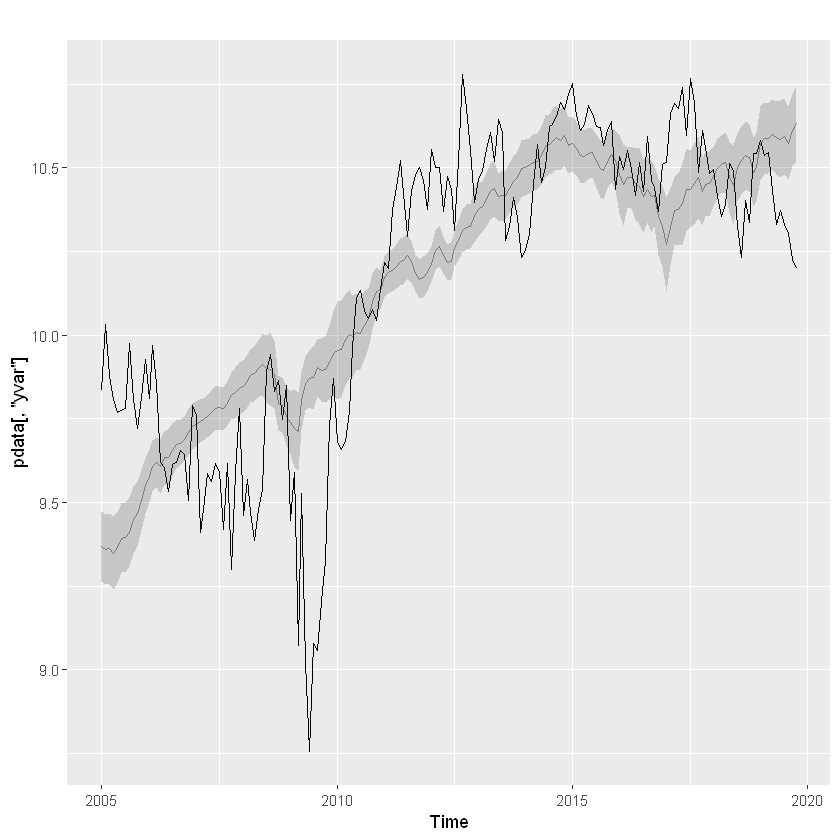

In [14]:
yvar <- ts(log(wrk_sa[,'qp_2_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa , data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)

## Estimación OLS: Producción de vehículos ligeros en México, SUV


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83942 -0.15038  0.01902  0.16539  0.71759 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -76.76479    4.76929 -16.096  < 2e-16 ***
log(masa_salarial_sa)   4.00490    0.22715  17.631  < 2e-16 ***
tc_fix_sa              -0.14551    0.02497  -5.829 2.68e-08 ***
cetes28_sa              0.02216    0.01496   1.481 0.140485    
pi_autos_sa             0.05499    0.01413   3.891 0.000142 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.341 on 173 degrees of freedom
Multiple R-squared:  0.8888,	Adjusted R-squared:  0.8863 
F-statistic: 345.8 on 4 and 173 DF,  p-value: < 2.2e-16


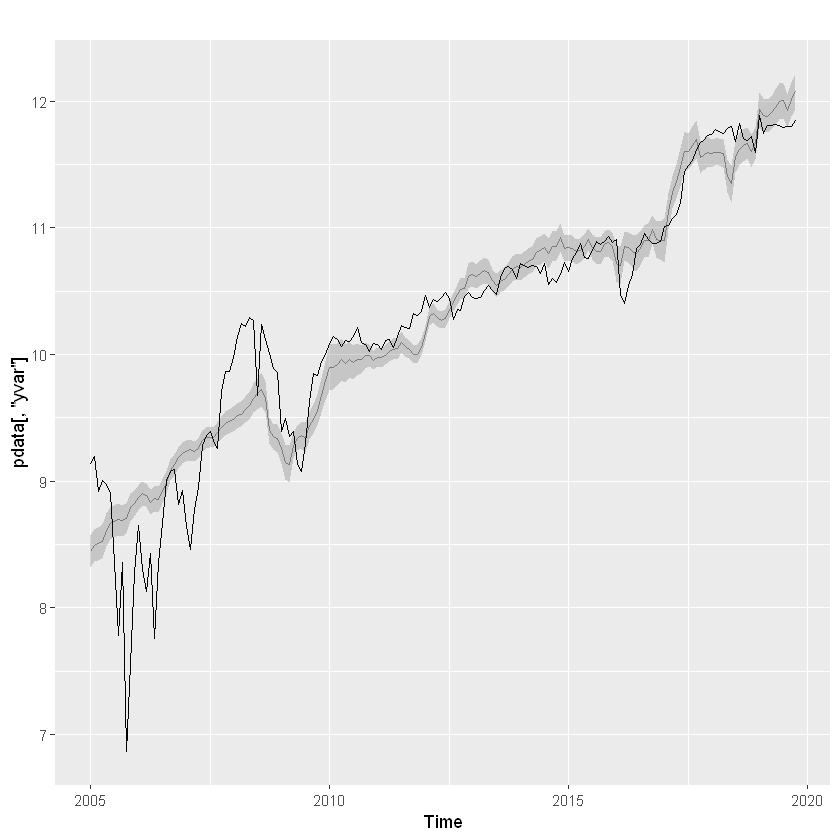

In [15]:
yvar <- ts(log(wrk_sa[,'qp_7_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa , data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)

## Estimación OLS: Exportación de vehículos ligeros en México


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58925 -0.05694  0.01305  0.07241  0.27399 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.952e+01  1.730e+00 -11.282  < 2e-16 ***
log(masa_salarial_sa)  1.460e+00  8.241e-02  17.716  < 2e-16 ***
tc_fix_sa             -5.584e-02  9.058e-03  -6.165 4.81e-09 ***
cetes28_sa            -2.094e-04  5.429e-03  -0.039   0.9693    
pi_autos_sa            9.431e-03  5.127e-03   1.840   0.0676 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1237 on 173 degrees of freedom
Multiple R-squared:  0.8829,	Adjusted R-squared:  0.8802 
F-statistic: 326.2 on 4 and 173 DF,  p-value: < 2.2e-16


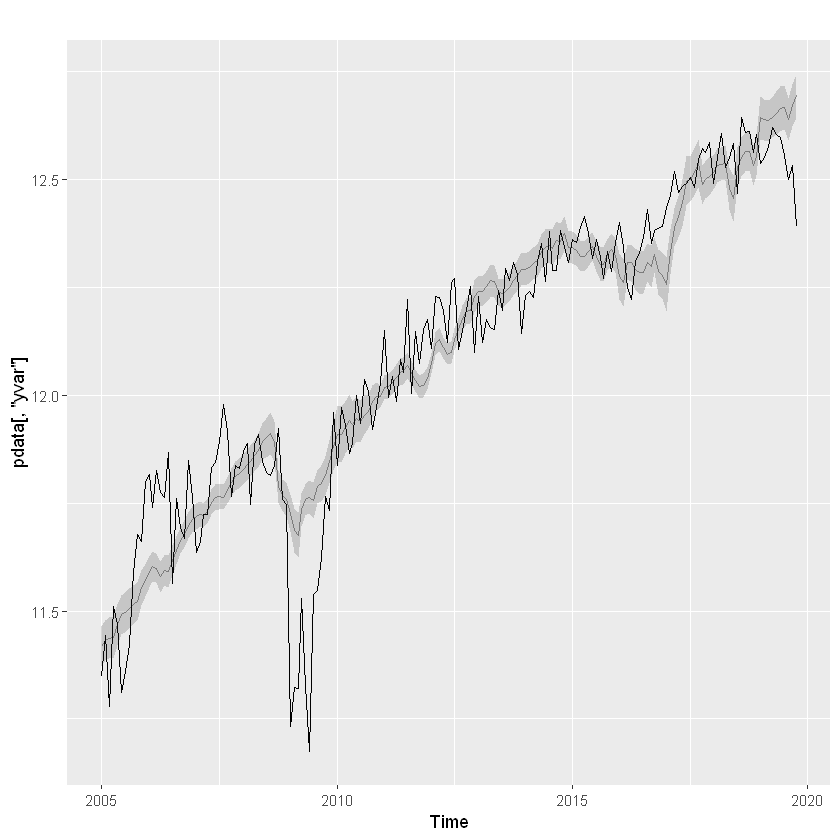

In [16]:
yvar <- ts(log(wrk_sa[,'qx_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa, data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)

## Estimación OLS: Exportación de vehículos ligeros en México, región NAFTA/T-MEC


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64321 -0.05688  0.01129  0.08204  0.30102 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -15.322192   1.961763  -7.810 5.26e-13 ***
log(masa_salarial_sa)   1.241422   0.093432  13.287  < 2e-16 ***
tc_fix_sa              -0.027685   0.010269  -2.696  0.00771 ** 
cetes28_sa              0.008638   0.006154   1.404  0.16224    
pi_autos_sa             0.001545   0.005813   0.266  0.79068    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1402 on 173 degrees of freedom
Multiple R-squared:  0.8489,	Adjusted R-squared:  0.8454 
F-statistic: 242.9 on 4 and 173 DF,  p-value: < 2.2e-16


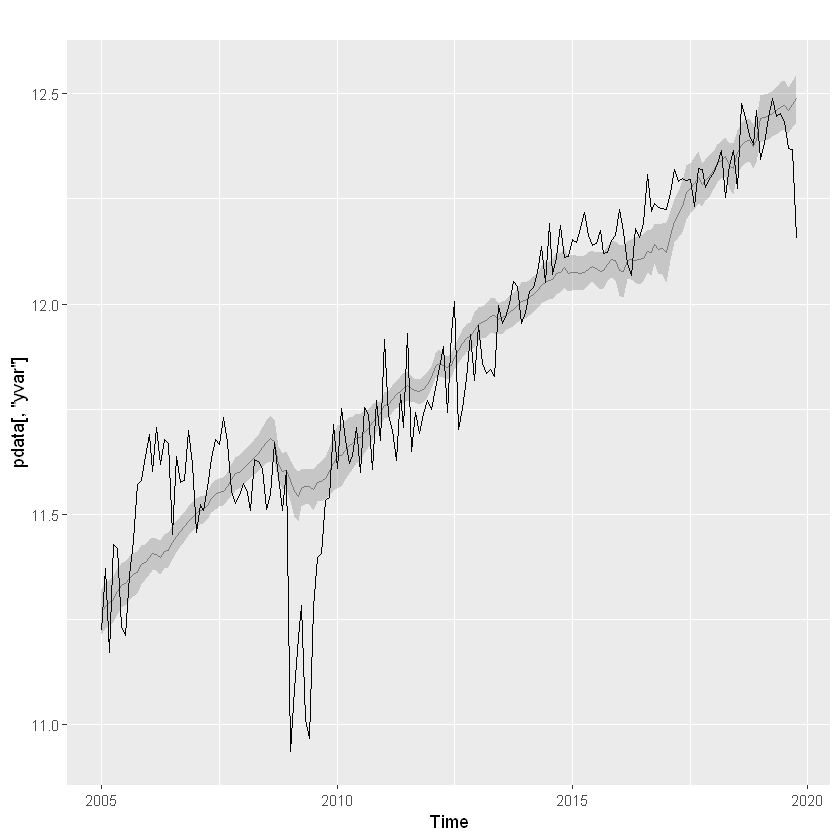

In [17]:
yvar <- ts(log(wrk_sa[,'qx_nafta_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa, data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)

## Estimación OLS: Exportación de vehículos ligeros en México, autos compactos


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63292 -0.09221  0.01198  0.09613  0.45223 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.8275381  2.3294400   1.643  0.10218    
log(masa_salarial_sa)  0.3662896  0.1109437   3.302  0.00117 ** 
tc_fix_sa             -0.0223269  0.0121938  -1.831  0.06882 .  
cetes28_sa            -0.0541669  0.0073080  -7.412 5.29e-12 ***
pi_autos_sa            0.0002223  0.0069021   0.032  0.97435    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1665 on 173 degrees of freedom
Multiple R-squared:  0.443,	Adjusted R-squared:  0.4301 
F-statistic:  34.4 on 4 and 173 DF,  p-value: < 2.2e-16


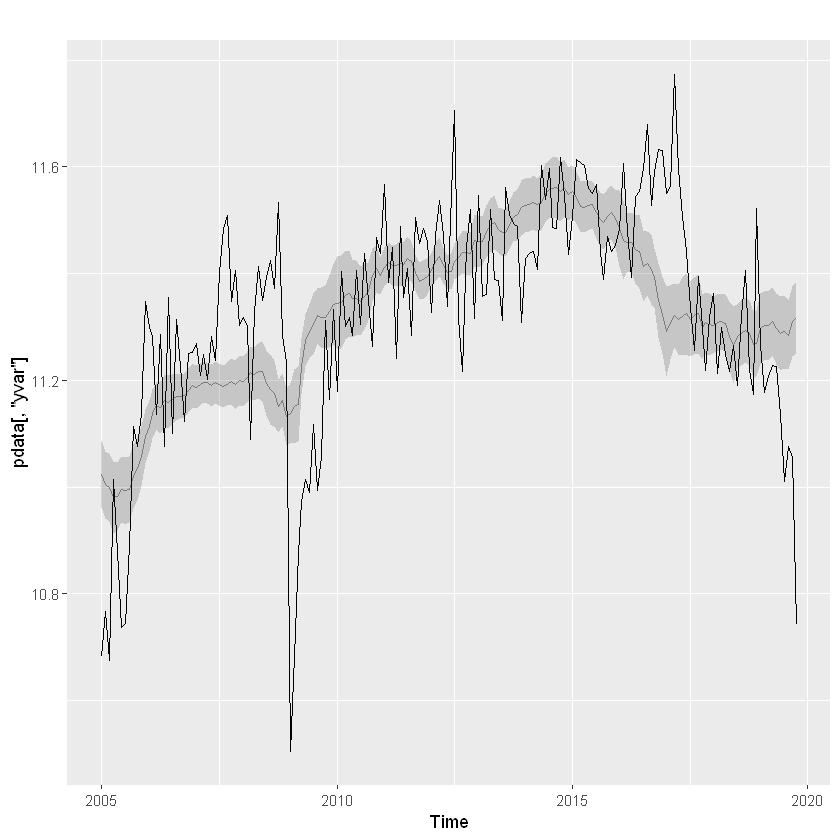

In [18]:
yvar <- ts(log(wrk_sa[,'qx_1_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa, data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)

## Estimación OLS: Exportación de vehículos ligeros en México, autos subcompactos

Warning message in log(wrk_sa[, "qx_2_sa"]):
"Se han producido NaNs"


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2573 -0.2867  0.0098  0.3529  2.1871 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -78.37768   11.37924  -6.888 1.04e-10 ***
log(masa_salarial_sa)   4.08513    0.54196   7.538 2.67e-12 ***
tc_fix_sa              -0.16657    0.05943  -2.803  0.00566 ** 
cetes28_sa             -0.16399    0.03583  -4.577 9.05e-06 ***
pi_autos_sa             0.03728    0.03368   1.107  0.26988    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8107 on 171 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.6343,	Adjusted R-squared:  0.6257 
F-statistic: 74.13 on 4 and 171 DF,  p-value: < 2.2e-16


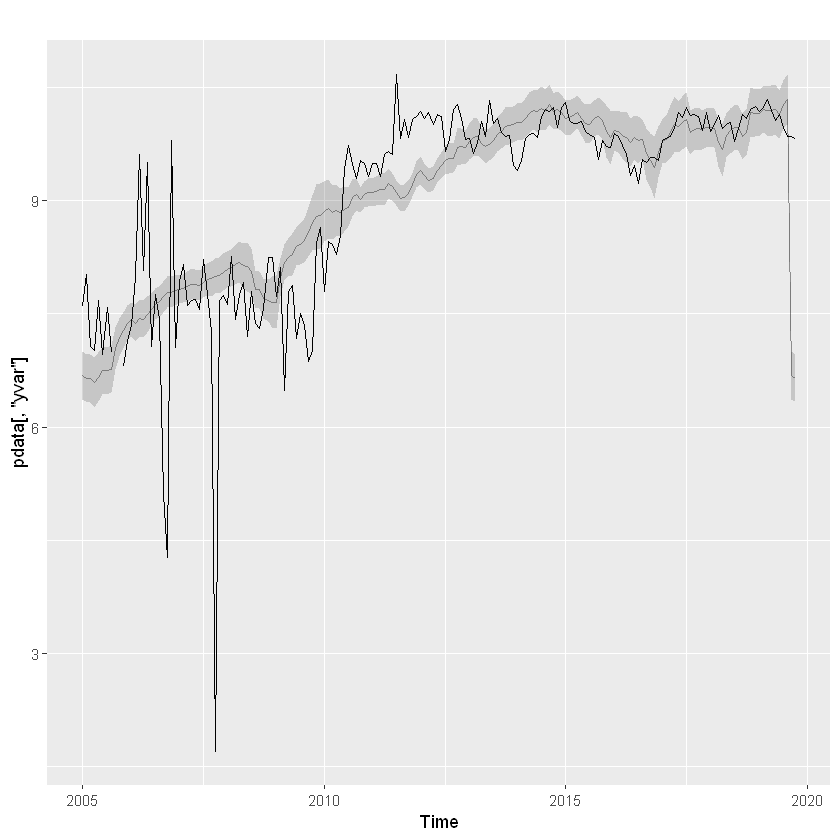

In [19]:
yvar <- ts(log(wrk_sa[,'qx_2_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa, data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)

## Estimación OLS: Exportación de vehículos ligeros en México, SUV


Call:
lm(formula = yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + 
    pi_autos_sa, data = as_tibble(wrk_sa))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89692 -0.18855  0.04548  0.23377  0.82828 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -80.05182    5.28266 -15.154  < 2e-16 ***
log(masa_salarial_sa)   4.14551    0.25160  16.477  < 2e-16 ***
tc_fix_sa              -0.15246    0.02765  -5.513 1.26e-07 ***
cetes28_sa              0.04459    0.01657   2.691 0.007831 ** 
pi_autos_sa             0.05350    0.01565   3.418 0.000787 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3777 on 173 degrees of freedom
Multiple R-squared:  0.8705,	Adjusted R-squared:  0.8675 
F-statistic: 290.6 on 4 and 173 DF,  p-value: < 2.2e-16


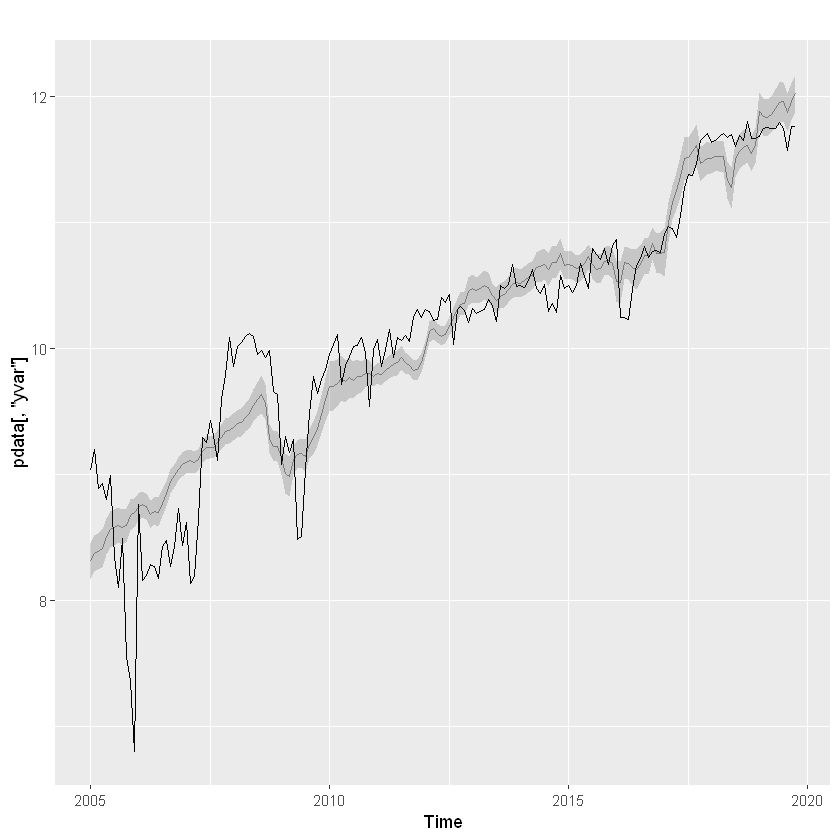

In [20]:
yvar <- ts(log(wrk_sa[,'qx_7_sa']), frequency=12, start=c(2005,1), end=c(2019,10))

mult_mod <- lm(yvar ~ log(masa_salarial_sa) + tc_fix_sa + cetes28_sa + pi_autos_sa, data=as_tibble(wrk_sa))
summary(mult_mod)

hat <- ts(predict(mult_mod, interval="confidence"), frequency=12, start=c(2005,1), end=c(2019,10))
pdata <- ts(cbind(yvar,hat), frequency=12, start=c(2005,1), end=c(2019,10) ) 
#head(pdata)
autoplot(pdata[,'yvar']) + 
    geom_line(aes(y=pdata[,'hat.fit']), alpha=0.4) + 
    geom_ribbon(aes(ymin=pdata[,'hat.lwr'], ymax=pdata[,'hat.upr']), alpha=0.2)
    
rm(mult_mod, hat, yvar, pdata)